In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.05, 
                               height_shift_range=0.05, 
                               rescale=1/255,
                               shear_range=0.1, 
                               zoom_range=0.05, 
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

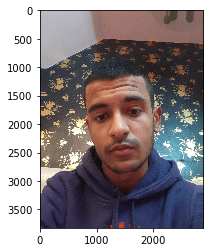

In [3]:
d2 = cv2.imread('Project2/train/Ritwik/20200110_184945.jpg')
d2 = cv2.cvtColor(d2,cv2.COLOR_BGR2RGB)
plt.imshow(image_gen.random_transform(d2))

In [4]:
image_gen.flow_from_directory("Project2/Train")

Found 20 images belonging to 2 classes.


In [5]:
image_gen.flow_from_directory("Project2/Test")

Found 10 images belonging to 2 classes.


In [6]:
image_shape = (150,150,3)

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(4,4),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.3))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 147, 147, 32)      1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

In [9]:
batch_size=5
train_image_gen = image_gen.flow_from_directory('Project2/train',
                                                batch_size=batch_size,
                                               target_size=image_shape[:2],
                                               class_mode='binary')

Found 20 images belonging to 2 classes.


In [10]:
test_image_gen = image_gen.flow_from_directory("Project2/Test", 
                                               batch_size=batch_size,
                                               target_size=image_shape[:2],
                                               class_mode='binary')

Found 10 images belonging to 2 classes.


In [11]:
train_image_gen.class_indices

{'Himanshi': 0, 'Ritwik': 1}

In [12]:
warnings.filterwarnings('ignore')

In [13]:
results = model.fit_generator(train_image_gen,epochs=10,
                              steps_per_epoch=1,
                              validation_data=test_image_gen,
                             validation_steps=1)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6868 - acc: 0.6000 - val_loss: 0.9769 - val_acc: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 864ms/step - loss: 0.7281 - acc: 0.6000 - val_loss: 1.0524 - val_acc: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 864ms/step - loss: 0.6638 - acc: 0.8000 - val_loss: 0.7214 - val_acc: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 0.9445 - acc: 0.4000 - val_loss: 0.7334 - val_acc: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.6638 - acc: 0.4000 - val_loss: 0.7184 - val_acc: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.6174 - acc: 0.8000 - val_loss: 0.7497 - val_acc: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 864ms/step - loss: 0.9453 - acc: 0.2000 - val_loss: 0.6976 - val_acc: 0.5000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 0.6834 - acc: 0.6000 - val_loss: 

In [14]:
#For Predicting New image
#please add the image path
file = 'Project2\RitwikImage.jpg  '

img = image.load_img(file, target_size=(150, 150))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [15]:
model.predict_classes(img)

array([[1]])

In [16]:
prediction_prob = model.predict(img)

In [17]:
print(f'Probability of that image is: {prediction_prob} ')

Probability of that image is: [[0.5158435]] 
